In [53]:
import pandas as pd
import numpy as np

In [54]:
df = pd.read_csv('train.csv')

In [55]:
print(df.head(1))
print()
print(df.shape)
print()
print(df.isnull().sum())
print()
print(df.dtypes)

   PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  
0      0  A/5 21171  7.25   NaN        S  

(891, 12)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [56]:
print(df['Pclass'].unique())
print(df['Survived'].unique())
print(df['Sex'].unique())
print(df['Cabin'].unique())
print(df['Embarked'].unique())

[3 1 2]
[0 1]
['male' 'female']
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
['S' 'C' 'Q

In [57]:
# drop those cols where more than 35% of data is nan
cols_to_drop = df.isnull().sum()[df.isnull().sum() > (35/100 * df.shape[0])]
df.drop(cols_to_drop.index, axis=1, inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [58]:
# replace numeric cols na with col mean
df.fillna(df.mean(), inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [59]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [60]:
df['Embarked'].fillna(df['Embarked'].describe()['top'], inplace=True)

In [61]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

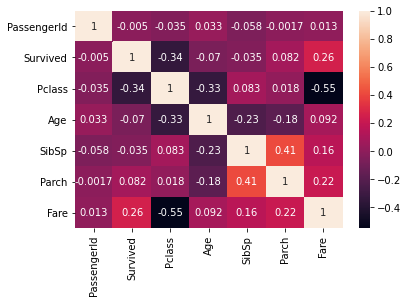

In [62]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [63]:
df['FamMembers'] = df['Parch'] + df['SibSp']
df.drop(['Parch', 'SibSp'], axis=1, inplace=True)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  \
0                            Braund, Mr. Owen Harris    male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
2                             Heikkinen, Miss. Laina  female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
4                           Allen, Mr. William Henry    male  35.0   

             Ticket     Fare Embarked  FamMembers  
0         A/5 21171   7.2500        S           1  
1          PC 17599  71.2833        C           1  
2  STON/O2. 3101282   7.9250        S           0  
3            113803  53.1000        S           1  
4            373450   8.0500        S           0  


<AxesSubplot:>

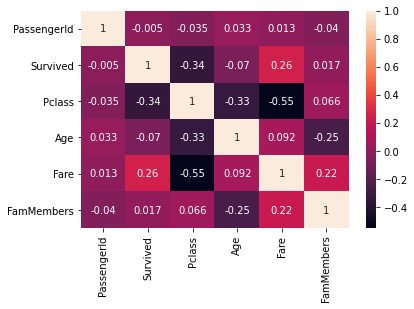

In [64]:
print(df.head())
sns.heatmap(df.corr(), annot=True)

In [65]:
df['Alone'] = [0 if df['FamMembers'][i] > 0 else 1 for i in df.index]

<AxesSubplot:>

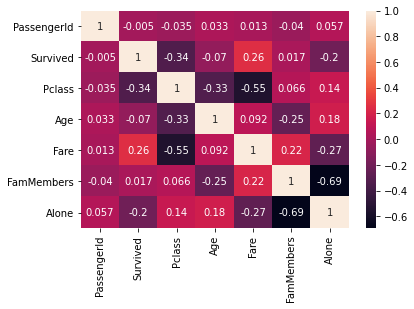

In [66]:
sns.heatmap(df.corr(), annot=True)

In [72]:
df['IsMale'] = [1 if df['Sex'][i]=='male' else 0 for i in df.index]
df.drop(['Sex'], axis=1, inplace=True)
df['IsMale'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

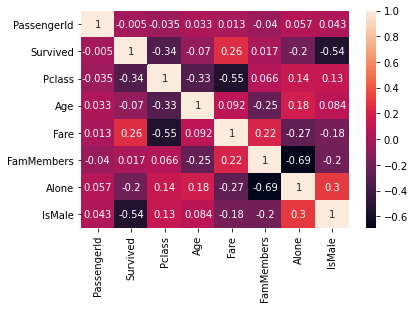

In [73]:
sns.heatmap(df.corr(), annot=True)

In [74]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'Ticket', 'Fare',
       'Embarked', 'FamMembers', 'Alone', 'IsMale'],
      dtype='object')

In [75]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
Ticket          object
Fare           float64
Embarked        object
FamMembers       int64
Alone            int64
IsMale           int64
dtype: object

In [76]:
print(df.groupby(['Pclass'])['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [77]:
print(df.groupby(['IsMale'])['Survived'].mean())

IsMale
0    0.742038
1    0.188908
Name: Survived, dtype: float64


In [78]:
print(df.groupby(['Alone'])['Survived'].mean())

Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


In [ ]:
# Inferences
# 1. High class -> high chances of survival
# 2. If not alone -> high chances of survival
# 3. If female -> high chances of survival